# Photo Triage Using Google Inception v3, Fine-Tuned, Image Classifier CNN
## Predictions on 6 test images:
## USAGE: The correct classification is shown in the filename at the top of each figure, the models classification is shown in red.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.models import load_model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


### Set the model image input dimensions (it is nessesary to reduce the pixel width and size for compute times when training the model)

In [3]:
imheight=299
imwidth=299

### Point to the directory where the images are stored:

In [4]:
# get data and classes
datagen = image.ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        rescale=1./255)
    
predict_generator = datagen.flow_from_directory(
        'Predict',
        target_size=(imheight, imwidth),
        color_mode='rgb',
        classes=None,
        class_mode=None,
        batch_size=1,
        shuffle=False,
        seed=None,
        save_to_dir=None,
        save_prefix='',
        save_format='png',
        follow_links=False,
        subset=None,
        interpolation='lanczos')

    

Found 6 images belonging to 1 classes.


### Load trained CNN Model with weights (see other notebook for training process)

In [5]:
model=load_model('photoSort_61.h5')

### Send images to the model and make prediction

In [6]:
pred=model.predict_generator(predict_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)

6/6 [==============================] - 7s 1s/step


### Plot out the images with the model classification

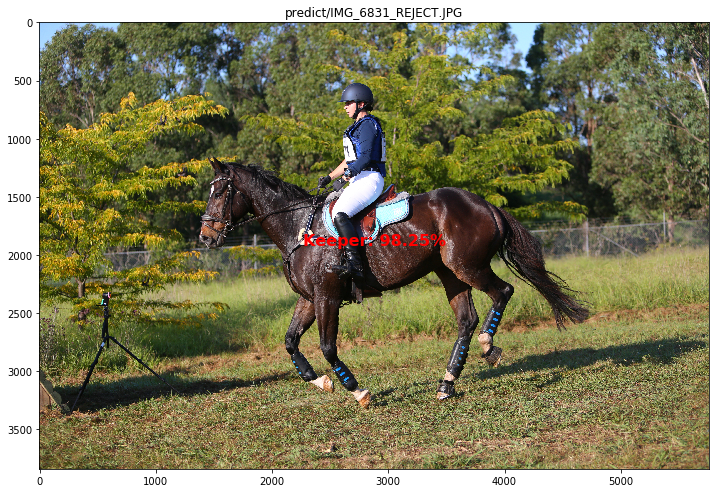

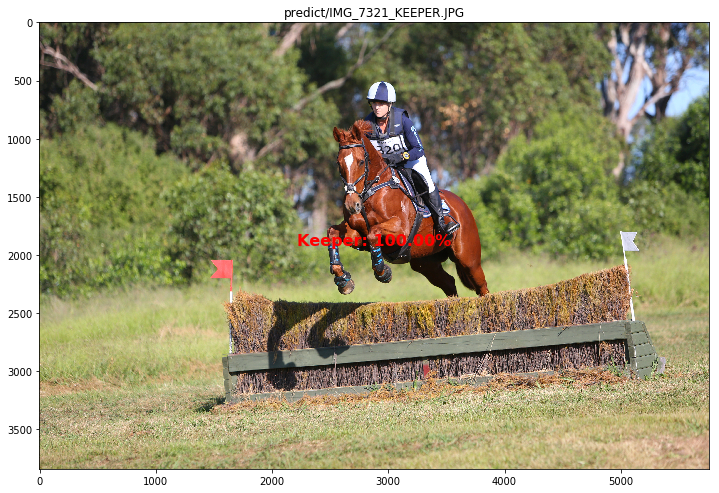

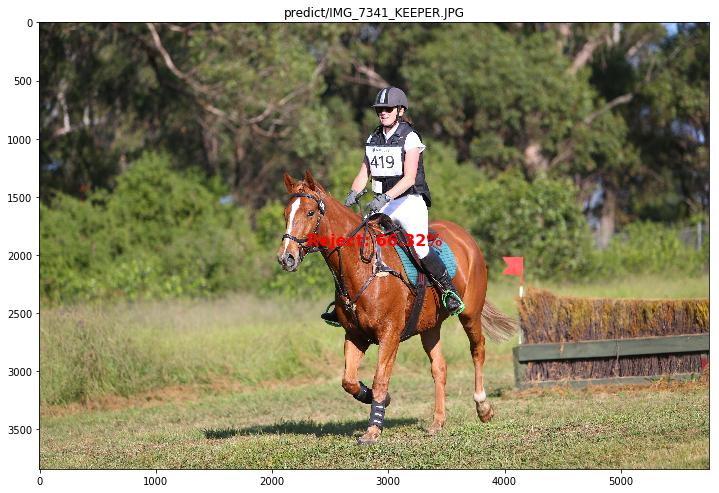

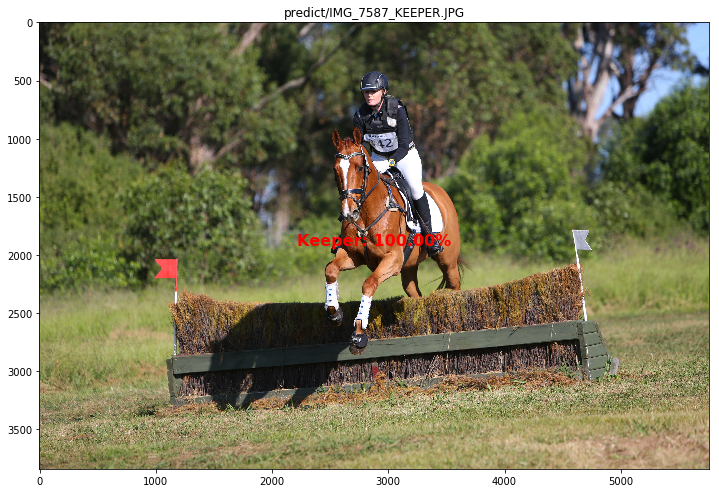

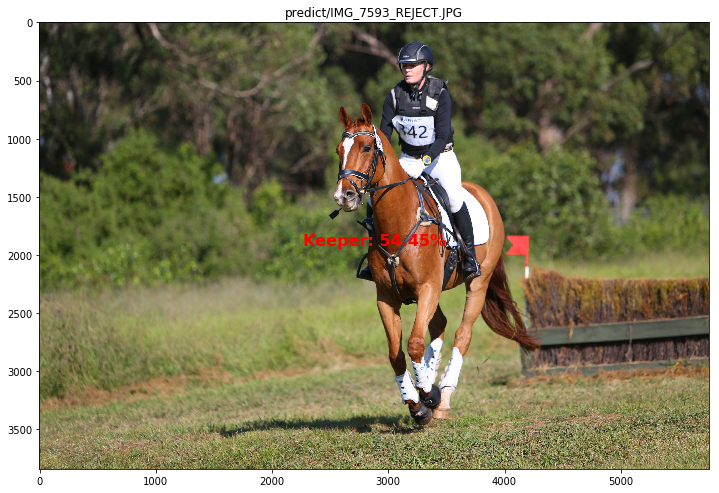

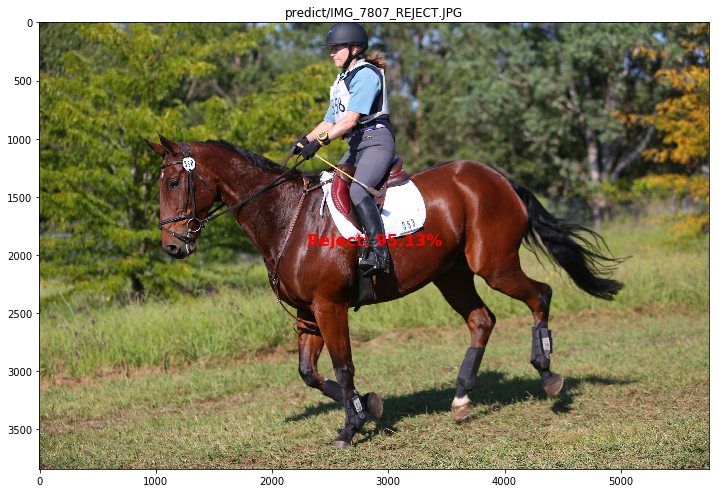

In [7]:
for i in range(predict_generator.n):
    plt.figure(figsize=(12,12))
    img = mpimg.imread(predict_generator.directory+"/"+predict_generator.filenames[i])
    x=img.shape[1]
    y=img.shape[0]
    label = "Keeper" if pred[i,0] > pred[i,1] else "Reject"
    proba = pred[i,0] if pred[i,0] > pred[i,1] else pred[i,1]
    label = "{}: {:.2f}%".format(label, proba * 100)
    plt.imshow(img)
    plt.title(predict_generator.filenames[i])
    plt.text(x/2,y/2,label, fontsize=16, horizontalalignment='center',color='red',fontweight='bold')
    plt.show()